# BIXI Montreal Exploratory Data Analysis

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Load the csv Data Files to Dataframe

In [2]:
# Load Bike Trip & Weather data of April 2018
df_trip_weather = pd.read_csv('processed-data/bixi-trip-weather-data-2018-04.csv', error_bad_lines=False)
df_trip_weather
# Load Station Location Data of 2018
#df_station = pd.read_csv('raw-data/bixi-trip-2018/Stations_2018.csv', error_bad_lines=False)

,Start Date,Start Year,Start Month,Start Day,Start Week Day,Start Hour,Start Minute,Start Station Code,End Date,End Station Code,Duration Sec,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km)
0,2018-04-10 11:56:00,2018,4,10,1,11,56,7030,2018-04-10 11:57:00,6141,87,1,2.60,53,16,24.10
1,2018-04-10 11:56:00,2018,4,10,1,11,56,6100,2018-04-10 11:59:00,6064,122,1,2.60,53,16,24.10
2,2018-04-10 11:57:00,2018,4,10,1,11,57,6730,2018-04-10 12:16:00,6396,1132,1,2.60,53,16,24.10
3,2018-04-10 11:58:00,2018,4,10,1,11,58,6108,2018-04-10 12:02:00,6114,271,1,2.60,53,16,24.10
4,2018-04-10 12:01:00,2018,4,10,1,12,1,6223,2018-04-10 12:10:00,6233,513,1,3.00,59,13,24.10
5,2018-04-10 12:03:00,2018,4,10,1,12,3,6043,2018-04-10 12:05:00,6041,98,1,3.00,59,13,24.10
6,2018-04-10 12:04:00,2018,4,10,1,12,4,6397,2018-04-10 12:09:00,6396,293,1,3.00,59,13,24.10
7,2018-04-10 12:06:00,2018,4,10,1,12,6,6007,2018-04-10 12:12:00,6073,409,1,3.00,59,13,24.10
8,2018-04-10 12:06:00,2018,4,10,1,12,6,6027,2018-04-10 12:12:00,6107,358,1,3.00,59,13,24.10
9,2018-04-10 12:06:00,2018,4,10,1,12,6,6137,2018-04-10 12:09:00,6138,161,1,3.00,59,13,24.10


## Data Perspective

- One variable
    - Numerial variables
        - Continuous:
        - Discrete:
    - Categorical variables
        - Ordinal:
        - Nominal:
- Multiple variables
    - Numeric x Numeric
    - Categotic x Categoric
    - Numeric x Categoric

##### One Numerial Variable

In [3]:
# Total Number of Trips
len(df_trip_weather.index)

236769

In [4]:
# Total Trip Duration
sec = df_trip_weather['Duration Sec'].sum()
print("Total Trip in Second: ", sec)

Total Trip in Second:  173263594


count   236769.00
mean       732.00
std        580.00
min         61.00
25%        325.00
50%        565.00
75%        978.00
max       7189.00
Name: Duration Sec, dtype: float64


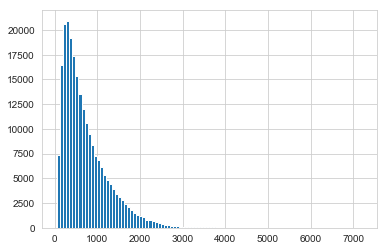

In [5]:
# Trip duration distribution
# Histogram
print(df_trip_weather['Duration Sec'].describe().round())
plt.hist(df_trip_weather['Duration Sec'], bins=100)
plt.show()

In [6]:
# Comment: The data in the following graph are right-skewed. Most of the sample values are clustered on the right side of the histogram

In [7]:
# Total Trips in each Week Day (0= Monday, 6 = Sunday)
df_trip_weather['Start Week Day'].value_counts()

4    46234
5    40422
0    35901
1    32838
3    27947
2    27297
6    26130
Name: Start Week Day, dtype: int64

In [8]:
# Total Trip Duration in each Week Day
df_trip_weather.groupby(by = 'Start Week Day')['Duration Sec'].sum()

Start Week Day
0    26768044
1    24626504
2    17541305
3    17831145
4    32708699
5    32321421
6    21466476
Name: Duration Sec, dtype: int64

##### One Categorical Variable

In [9]:
# Popular destination station (number of trips ended in a particular station)
df_trip_weather['End Station Code'].value_counts().head()

6015    2694
6100    2558
6012    2218
6184    2086
6154    1776
Name: End Station Code, dtype: int64

##### Multiple Variables

In [10]:
# Correlation
df_trip_weather.corr()

,Start Year,Start Month,Start Day,Start Week Day,Start Hour,Start Minute,Start Station Code,End Station Code,Duration Sec,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km)
Start Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Start Month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Start Day,nan,nan,1.00,-0.03,0.01,0.00,-0.00,0.00,0.06,-0.09,0.55,0.06,-0.24,0.31
Start Week Day,nan,nan,-0.03,1.00,-0.07,0.01,0.00,-0.00,0.04,-0.12,-0.23,-0.05,0.02,0.06
Start Hour,nan,nan,0.01,-0.07,1.00,-0.05,-0.02,0.01,0.00,-0.03,0.21,-0.15,0.08,-0.04
Start Minute,nan,nan,0.00,0.01,-0.05,1.00,0.00,0.00,-0.01,-0.00,-0.01,0.00,0.01,0.02
Start Station Code,nan,nan,-0.00,0.00,-0.02,0.00,1.00,0.11,0.00,0.02,-0.01,0.00,-0.01,0.00
End Station Code,nan,nan,0.00,-0.00,0.01,0.00,0.11,1.00,0.01,0.02,0.01,-0.00,-0.00,-0.00
Duration Sec,nan,nan,0.06,0.04,0.00,-0.01,0.00,0.01,1.00,-0.27,0.13,-0.13,-0.07,0.15
Is Member,nan,nan,-0.09,-0.12,-0.03,-0.00,0.02,0.02,-0.27,1.00,-0.11,0.11,0.06,-0.10


In [11]:
# Average Temparature, Humadity, Windspeed and Visivility of Each Day
df_trip_weather.groupby(by = 'Start Day')['Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)'].mean()

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km)
Start Day,,,,
10,2.05,72.98,13.44,24.10
11,4.60,56.28,17.39,24.10
12,6.63,67.00,17.97,19.27
13,6.90,73.28,12.81,23.40
14,-1.16,37.36,18.14,26.28
15,-2.04,50.32,32.79,24.72
16,2.31,83.99,34.97,22.72
17,2.01,88.81,23.68,17.95
18,5.10,74.26,27.05,25.68


## Business Perspective

Descriptive Analytics:
- What is the BIXI Ride hourly trend?
- What is the popular day of a week for BIXI riders?
- What is the ratio of members and non-members ride?
- What are the poular stations of BIXI Riders?

Diagnostic Analytics:
- What are the ride factors?

#### Descriptive Analytics:

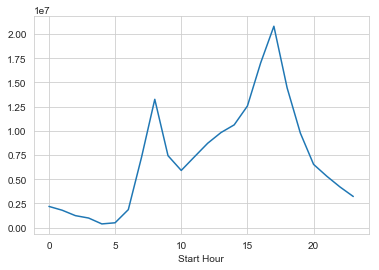

In [12]:
# What is the BIXI Ride hourly trend?

df_trip_weather.groupby(by = 'Start Hour')['Duration Sec'].sum().plot(kind='line')
plt.show()

In [13]:
# Comment: 8 AM , 3 to 6 PM is the most demanding hours for BIXI riders.

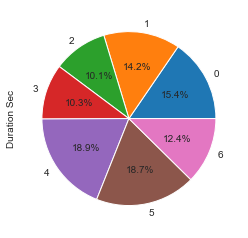

In [14]:
# What is the popular day of week for BIXI riders?

# Total Trip Duration in each Week Day (0 = MOnday and 6 = Sunday)
df_trip_weather.groupby(by = 'Start Week Day')['Duration Sec'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [15]:
# Comment: Friday and Saturday is the most popular day for BIXI riders.  

1    206854
0     29915
Name: Is Member, dtype: int64
Is Member
0     34118408
1    139145186
Name: Duration Sec, dtype: int64


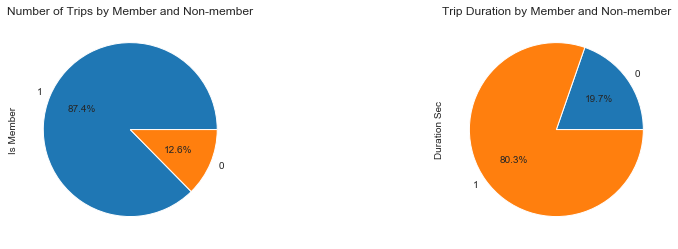

In [16]:
# What is the ratio of members and non-members ride?

# Define the figure size
plt.figure(figsize=(14, 4))

# Number of Trips by Member and Non-member
print(df_trip_weather['Is Member'].value_counts())

plt.subplot(121) # (row, column, position)
df_trip_weather['Is Member'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Trips by Member and Non-member')

# Total Trip Duration by Member and Non-member
print(df_trip_weather.groupby(by = 'Is Member')['Duration Sec'].sum())

plt.subplot(122)
df_trip_weather.groupby(by = 'Is Member')['Duration Sec'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Trip Duration by Member and Non-member')
plt.show()


In [17]:
# Comments: Non-members average trip duration is higher then members average trip duration 

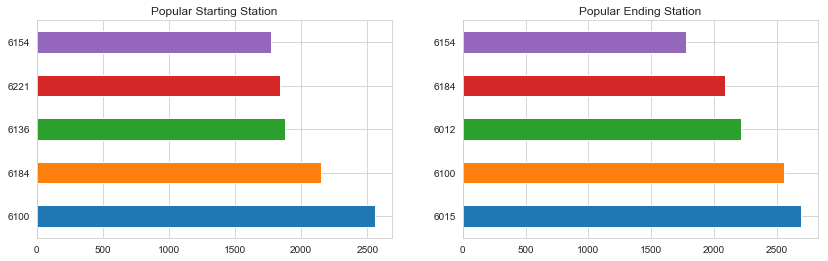

In [18]:
#What are the poular stations of BIXI Riders?

# Define the figure size
plt.figure(figsize=(14, 4))

# Popular starting station (number of trips start in a particular station)
plt.subplot(121) # (row, column, position)
df_trip_weather['Start Station Code'].value_counts().head().plot(kind='barh')
plt.title('Popular Starting Station')

# Popular ending station (number of trips end in a particular station)
plt.subplot(122)
df_trip_weather['End Station Code'].value_counts().head().plot(kind='barh')
plt.title('Popular Ending Station')
plt.show()

In [19]:
# Comments: Stattion 6154 and 6184 are popular stations for starting and ending the ride.

#### Diagnostic Analytics:

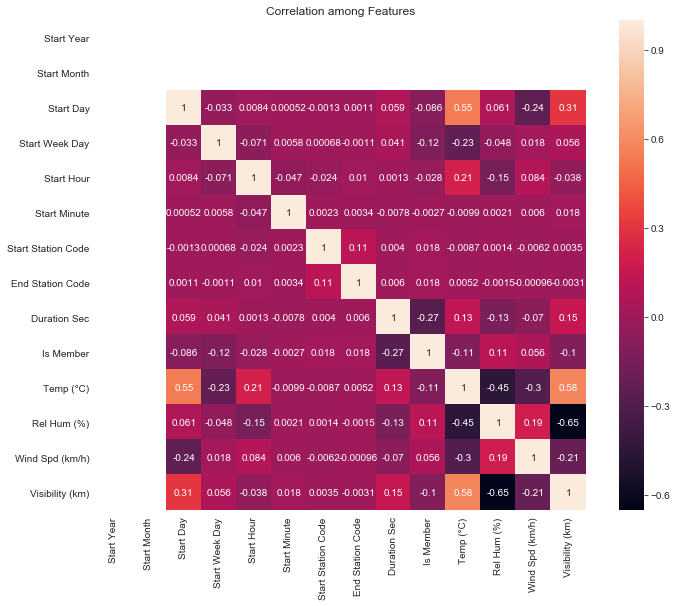

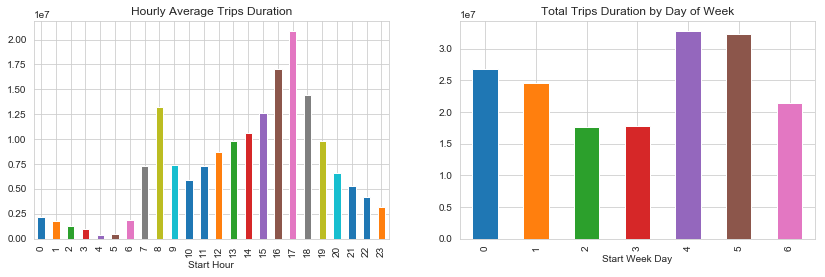

In [20]:
#What are the ride factors?

# heatmap
corrmat = df_trip_weather.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True)
plt.title('Correlation among Features')
plt.show()

# Define the figure size
plt.figure(figsize=(14, 4))

# Bar Chart (1)
plt.subplot(121) # (row, column, position)
df_trip_weather.groupby(by = 'Start Hour')['Duration Sec'].sum().plot(kind='bar')
plt.title('Hourly Average Trips Duration')

#Bar Chart (2)
plt.subplot(122) # (row, column, position)
df_trip_weather.groupby(by = 'Start Week Day')['Duration Sec'].sum().plot(kind='bar')
plt.title('Total Trips Duration by Day of Week')
plt.show()

In [21]:
# Comments: From Heatmap we see that there is no strong correlation with Duration and other features. 
# From 1st Bar Chart we see that there is high demand in specific hours; 8 AM, 4 PM to 6 PM.
# From 2st Bar Chart we see that there is high demand on Friday and Satuday